In [29]:
import pandas as pd
df=pd.read_csv("spam.csv",encoding="latin1")
df = df.dropna(axis=1)
df

Class                                                sms
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [30]:
ham_spam=df.Class.value_counts()
ham_spam

Class
ham     4825
spam     747
Name: count, dtype: int64

In [31]:
df["label"]=df.Class.map({"ham":0,"spam":1})

In [32]:
df.head()

Class                                                sms  label
0   ham  Go until jurong point, crazy.. Available only ...      0
1   ham                      Ok lar... Joking wif u oni...      0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3   ham  U dun say so early hor... U c already then say...      0
4   ham  Nah I don't think he goes to usf, he lives aro...      0

In [33]:
X=df.sms
y=df.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
X_train.head()

710     Height of Confidence: All the Aeronautics prof...
3740                                        2/2 146tf150p
2711    Wen ur lovable bcums angry wid u, dnt take it ...
3155                    Long time. You remember me today.
3748    Dear Voucher Holder 2 claim your 1st class air...
Name: sms, dtype: object

In [36]:
y_train.head()

710     0
3740    1
2711    0
3155    0
3748    1
Name: label, dtype: int64

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english")

In [38]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [39]:
len(vect.vocabulary_.keys())

7233

In [40]:
X_train_transformed=vect.transform(X_train)
X_test_transformed=vect.transform(X_test)

In [41]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train_transformed,y_train)
y_pred_class=mnb.predict(X_test_transformed)
y_pred_proba=mnb.predict_proba(X_test_transformed)

In [42]:
mnb

MultinomialNB()

In [43]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9892318736539842

In [44]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[1208,    5],
       [  10,  170]])

In [45]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
print(confusion)
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

[[1208    5]
 [  10  170]]


In [46]:
sensitivity=TP/float(FN+TP)
print("sensitivity",sensitivity)

sensitivity 0.9444444444444444


In [47]:
specificity=TN/float(TP+FP)
print("specificity",specificity)

specificity 6.902857142857143


In [48]:
precision=TP/float(TP+FP)
print("precision",precision)
print(metrics.precision_score(y_test,y_pred_class))

precision 0.9714285714285714
0.9714285714285714


In [49]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test,y_pred_class))
print("RECALL SCORE",metrics.recall_score(y_test,y_pred_class))
print("F1 SCORE",metrics.f1_score(y_test,y_pred_class))

precision 0.9714285714285714
PRECISION SCORE : 0.9714285714285714
RECALL SCORE 0.9444444444444444
F1 SCORE 0.9577464788732394


In [50]:
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], shape=(1393,))

In [51]:
y_pred_proba

array([[9.82620579e-01, 1.73794211e-02],
       [9.96851420e-01, 3.14857954e-03],
       [9.97617329e-01, 2.38267096e-03],
       ...,
       [9.99531899e-01, 4.68101278e-04],
       [9.99383564e-01, 6.16435987e-04],
       [9.98256818e-01, 1.74318187e-03]], shape=(1393, 2))

In [52]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

In [53]:
print(roc_auc)

0.9889621690940734


In [54]:
pd.DataFrame({"Threshold":thresholds,
              "TPR":true_positive_rate,
              "FPR":false_positive_rate
              })

Threshold       TPR       FPR
0             inf  0.000000  0.000000
1    1.000000e+00  0.294444  0.000000
2    1.000000e+00  0.350000  0.000000
3    1.000000e+00  0.355556  0.000000
4    1.000000e+00  0.372222  0.000000
..            ...       ...       ...
119  4.586805e-15  1.000000  0.985985
120  4.130879e-15  1.000000  0.987634
121  2.150415e-23  1.000000  0.995878
122  3.422251e-33  1.000000  0.999176
123  2.491860e-84  1.000000  1.000000

[124 rows x 3 columns]

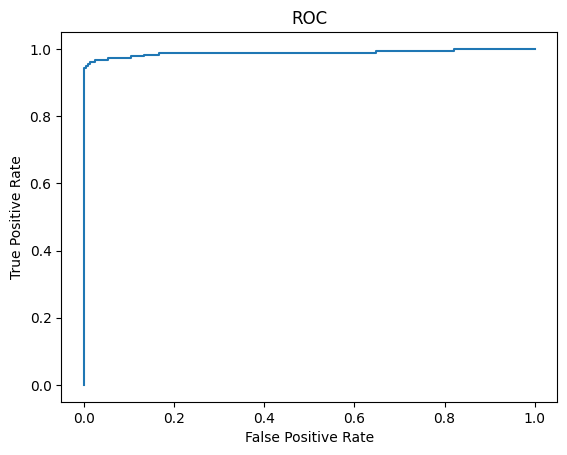

In [55]:
%matplotlib inline
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)